<a href="https://colab.research.google.com/github/ArpitKhedekar/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detector

In our digital age, information spreads at an unprecedented rate. However, amidst the genuine news, there's a rising tide of misinformation, commonly known as fake news. These deceptive narratives, deliberately crafted to deceive and mislead, pose a significant threat to public opinion, societal harmony, and even democratic processes.


Recognizing the gravity of this issue, the urgent need arises for an advanced Fake News Detection System. Such a system acts as a safeguard, tirelessly sifting through the vast sea of information, discerning fact from fiction. This can be done by leveraging cutting-edge technologies like Natural Language Processing (NLP) and Machine Learning.


The project aims to detect such fake news and empower individuals with the ability to critically assess the information they encounter.



We'll be using the Dataset avilable on Kaggle and importing it Using the Kaggle Api.



The below step is essential for using Kaggle datasets through the Kaggle API within the Colab environment.

# Downloading the Dataset

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [3]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

 80% 74.0M/92.1M [00:00<00:00, 85.5MB/s]
100% 92.1M/92.1M [00:00<00:00, 101MB/s] 


In [4]:
! unzip \*.zip && rm *.zip

Archive:  fake-news-classification.zip
  inflating: WELFake_Dataset.csv     


# Importing the necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Reading the csv file into Pandas Dataframe

In [6]:
df = pd.read_csv('WELFake_Dataset.csv')

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


# Data Preprocessing

In [8]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

Renaming the column named 'Unnamed: 0' to 'id' within the DataFrame.

In [9]:
df.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [10]:
df.shape

(72134, 4)

There are 72,134 rows and 4 columns.

In [11]:
df = df.sample(frac=0.7, random_state=42)
df.shape

(50494, 4)

Sampling a portion of the data is done to create a representative subset for model training and testing.

In [12]:
df.isna().sum()

id         0
title    400
text      23
label      0
dtype: int64

There are total 423 null values in the dataset.

In [13]:
df = df.fillna('')


In [14]:
df.isna().sum()

id       0
title    0
text     0
label    0
dtype: int64

# Text Preprocessing

In [15]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))


def stemming(text):

    words = word_tokenize(re.sub('[^a-zA-Z]', ' ', text.lower()))

    stemmed_words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(stemmed_words)



Created a function to perform stemming, lowercasing, and stopword removal and tokenization.

In [16]:
df['text'] = df['text'].map(stemming)

In [27]:
df.head()

,id,title,text,label
61370,61370,ARNOLD SCHWARZENEGGER Sends A Message To Liber...,,1
2189,2189,WOW! “We Mexicans Need To Kill Donald Trump Be...,messag peac uniti one neighbor south mexican k...,1
60609,60609,Jimmy Carter recovers from dehydration scare i...,winnipeg manitoba reuter former u presid jimmi...,0
51565,51565,2 Friars’ Mission: Reviving a Brooklyn Church ...,two franciscan friar complet robe stood behind...,0
39431,39431,Boy With Autism Makes His First Friend Ever An...,approxim children autism spectrum disord make ...,1


In [28]:
X = df['text'].values
y = df['label'].values

## Data Visualisation

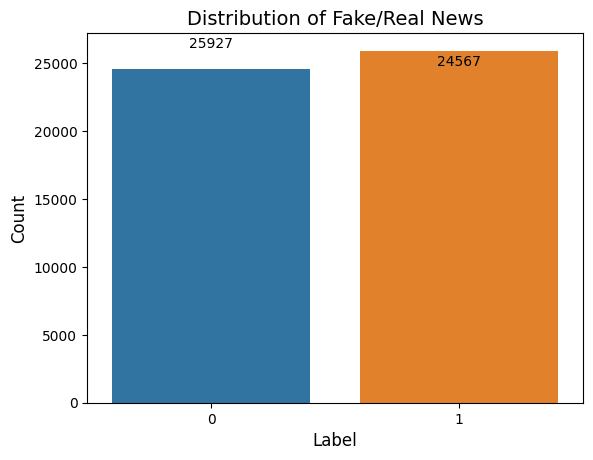

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['fake', 'real']
label_count = df.label.value_counts()

# Plotting the bar chart
sns.barplot(x=label_count.index, y=label_count)

# Adding count annotations to the bars
for index, value in enumerate(label_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Fake/Real News', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()



It shows that the number of real is less than fake news.

In [29]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

# Data Splitting

In [30]:
X_train,X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [31]:
X_train.shape

(40395, 135000)

# Model Training

In [32]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [33]:
train_svm_pred = svm_model.predict(X_train)
print("SVM Training accuracy score:", accuracy_score(train_svm_pred, y_train))

test_svm_pred = svm_model.predict(X_test)
print("SVM Test accuracy score:", accuracy_score(test_svm_pred, y_test))

SVM Training accuracy score: 0.9784626810248793
SVM Test accuracy score: 0.9498960293098326


# Fake News Detection System

In [41]:
input_data = X_test[100]
prediction = svm_model.predict(input_data)
if prediction[0] == 1:
    print('Real news')

else:
    print('Fake news')


Real news
